# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.044243e+01     7.221069e+00
 * time: 0.0040111541748046875
     1     2.823489e+01     5.339755e+00
 * time: 0.011922121047973633
     2     2.563879e+01     8.197255e+00
 * time: 0.03127408027648926
     3     1.499227e+01     3.104391e+00
 * time: 0.05423712730407715
     4     1.216471e+01     1.298068e+00
 * time: 0.0736379623413086
     5     1.103247e+01     1.114693e+00
 * time: 0.09255599975585938
     6     1.027839e+01     1.589856e+00
 * time: 0.10775899887084961
     7     9.770920e+00     7.320654e-01
 * time: 0.12334799766540527
     8     9.468520e+00     5.585493e-01
 * time: 0.13834214210510254
     9     9.246730e+00     7.344239e-01
 * time: 0.15324616432189941
    10     9.105962e+00     5.060708e-01
 * time: 0.1688079833984375
    11     8.942149e+00     6.561520e-01
 * time: 0.18471312522888184
    12     8.794549e+00     4.048729e-01
 * time: 0.2007460594177246
    13     8.721384e+00     3.212260e-01
 * time:

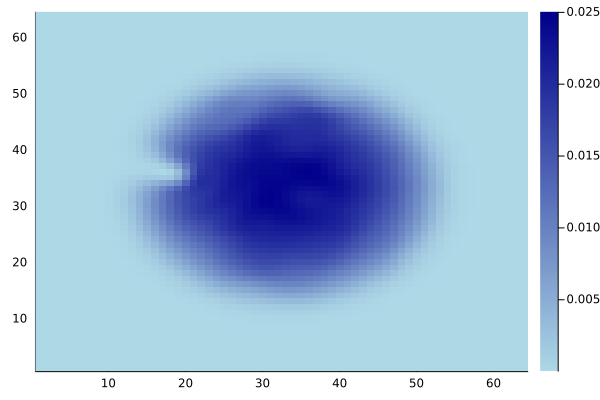

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)